In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [91]:
filename='electric-drill-01.wav'

In [92]:
import IPython.display as ipd
import resampy
import librosa.display
import librosa

import os

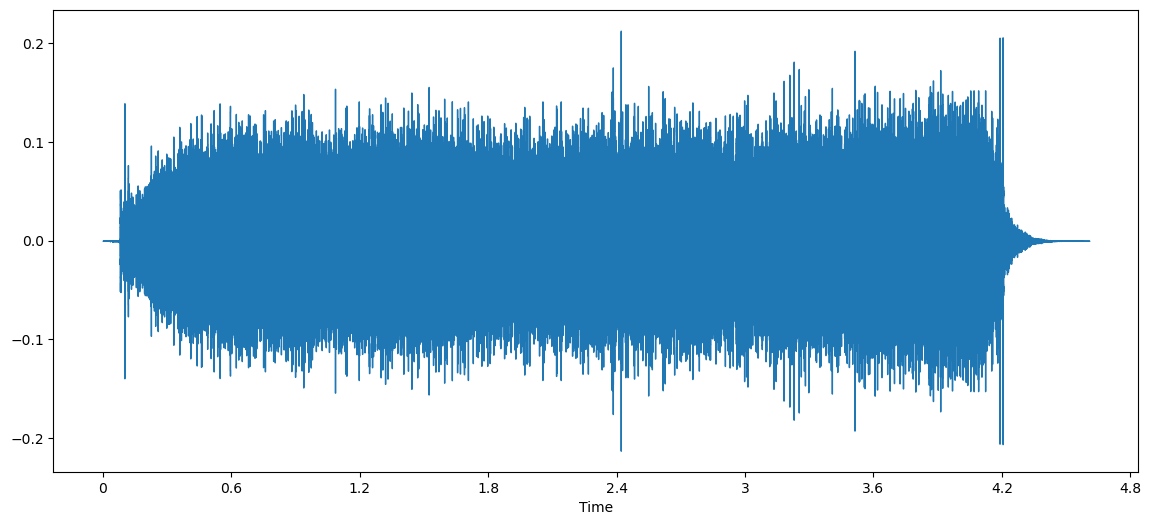

In [93]:
## Waveplot for the dog's barking
plt.figure(figsize=(14,6))
librosa_audio_data,librosa_sample_rate=librosa.load(filename)
librosa.display.waveshow(librosa_audio_data,sr=librosa_sample_rate)
ipd.Audio(filename)

In [94]:
librosa_sample_rate
# Sample rate is the number of samples per second that are taken of a waveform 
#  to create a discete digital signal.

#  Librosa will try to normalize the entire dataset and give the data w.r.t a 
#  single sample rate 

22050

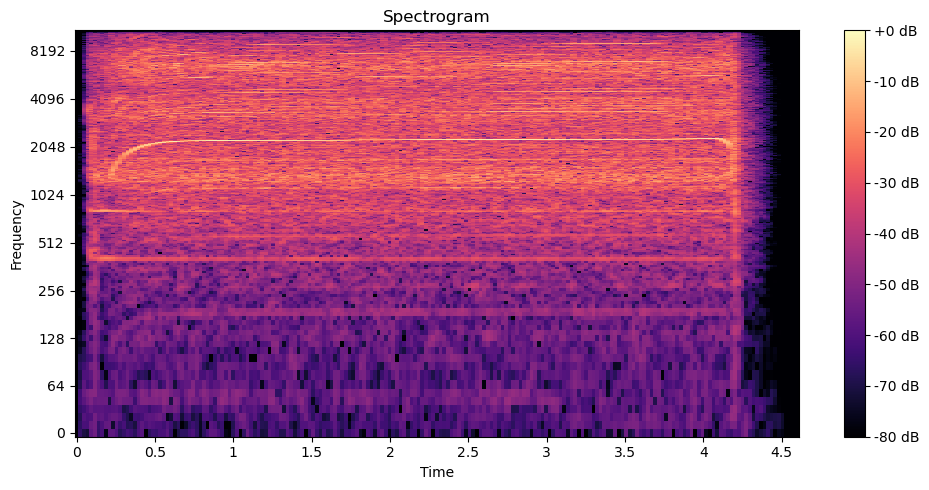

In [95]:
import numpy as np

#Calculate the Short-Time Fourier Transform (STFT) of the audio signal using librosa.stft(y) 

#Convert the STFT magnitude to decibels using librosa.amplitude_to_db()

D = librosa.amplitude_to_db(np.abs(librosa.stft(librosa_audio_data)), ref=np.max)

plt.figure(figsize=(10, 5))
#Use librosa.display.specshow() to display the spectrogram
librosa.display.specshow(D, sr=librosa_sample_rate, x_axis='time', y_axis='log')

plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [96]:
from scipy.io import wavfile as wav
wave_sample_rate,wave_audio =wav.read(filename)

In [97]:
wave_sample_rate        
#actual sample rate of the audio 

48000

In [98]:
wave_audio 


array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]], dtype=int16)

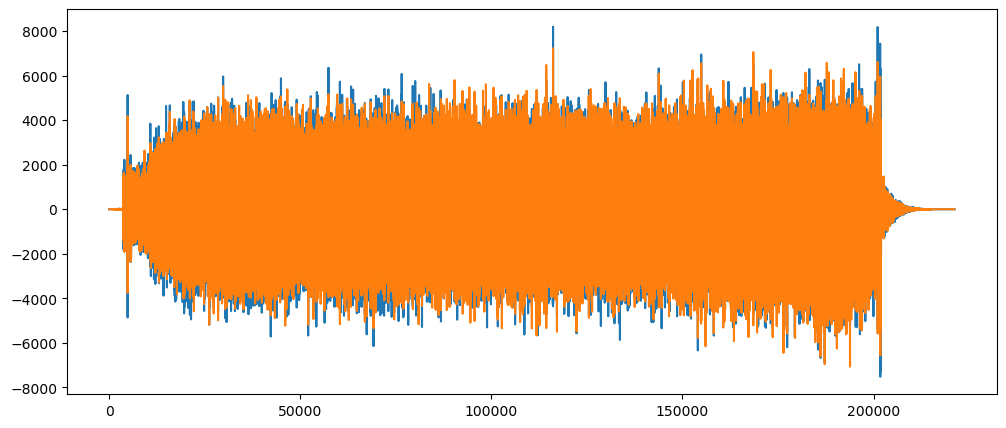

In [99]:
#plotting the data by using scipy's by default data
plt.figure(figsize=(12,5))
plt.plot(wave_audio)

#2 channels 

In [100]:

#normalized data using librosa 

In [101]:
import pandas as pd
audio_dataset_path='Audio_dataset/'
metadata = pd.read_csv('UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [102]:
#check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


<font size="5">Audio classification data preprocessing</font>

<font size="4">Extract Features : </font>
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [103]:
mfcc=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)

In [104]:
mfcc

array([[-7.8347974e+02, -7.3307672e+02, -5.2417957e+02, ...,
        -7.8442889e+02, -7.8442889e+02, -7.8442889e+02],
       [ 1.3410480e+00,  2.3309242e+01, -1.9632996e+01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 1.3373306e+00, -2.1260971e+01, -3.3916649e+01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 1.2909809e-01, -1.3768798e+00,  5.5590856e-01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 8.6198360e-02,  5.4543085e+00,  1.1462035e+00, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [ 4.4241466e-02,  6.3081727e+00,  1.0467562e+01, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00]], dtype=float32)

In [105]:
def feature_extractor(file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [106]:
# import numpy as np
# from tqdm import tqdm




# audio_dataset_path='Audio_dataset/'
# extracted_features=[]
# for index_num,row in tqdm(metadata.iterrows(),total=len(metadata)):
#     file_name=os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
#     final_class_labels=row["class"]
#     data=feature_extractor(file_name)
#     extracted_features.append([data,final_class_labels])
    
    
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients\
audio_dataset_path='Audio_dataset/'
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

8732it [10:05, 14.43it/s]


In [19]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [20]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [21]:
X.shape

(8732, 40)

In [22]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [23]:
#y=np.array(pd.get_dummies(y)) : label encoding using dummies
# Label Encoding
# One hot encodding

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [24]:
y.shape

(8732, 10)

In [25]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

<font size="4">**Splitting the dataset into training data and testing data** </font>

In [26]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [27]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746956e+01, ...,
         3.24665260e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273319e+00, ...,
        -3.25305033e+00, -5.27745247e+00, -1.55697143e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920441e+00,  3.52480578e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490825e-01,  7.11009085e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155220e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066067e+00, ...,
        -5.38886738e+00, -3.37136054e+00, -1.56651151e+00]], dtype=float32)

In [28]:
X_train.shape

(6985, 40)

In [29]:
X_test.shape


(1747, 40)

In [30]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [130]:
y_test.shape

(1747, 10)

# Model creation


In [32]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,LSTM
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [34]:
# no. of classes
num_labels=y.shape[1]

<font size="5">**Define a fully connected Neural Network model with following attributes:**</font>

* Total number of hidden layers = 3, all with relu activation
* Number of neurons in first hidden layer = 100 
* Number of neurons in first hidden layer = 200
* Number of neurons in first hidden layer = 100
* Last layer's activation funciton is 'Softmax'

In [35]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

<font size="5">Compile and train the fully connected neural network model</font>

In [37]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [38]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 300
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/300
201/219 [==========================>...] - ETA: 0s - loss: 12.1093 - accuracy: 0.1199
Epoch 1: val_loss improved from inf to 2.29096, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 2s 5ms/step - loss: 11.4036 - accuracy: 0.1208 - val_loss: 2.2910 - val_accuracy: 0.1185
Epoch 2/300
218/219 [============================>.] - ETA: 0s - loss: 2.5389 - accuracy: 0.1194
Epoch 2: val_loss improved from 2.29096 to 2.28284, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.5384 - accuracy: 0.1194 - val_loss: 2.2828 - val_accuracy: 0.1070
Epoch 3/300
207/219 [===========================>..] - ETA: 0s - loss: 2.3242 - accuracy: 0.1215
Epoch 3: val_loss improved from 2.28284 to 2.27025, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 2.3229 - accuracy: 0.1215 - val_loss: 2.2703 - val_accuracy: 0.11

219/219 [==============================] - 1s 5ms/step - loss: 1.5298 - accuracy: 0.4510 - val_loss: 1.3076 - val_accuracy: 0.5650
Epoch 26/300
211/219 [===========================>..] - ETA: 0s - loss: 1.5202 - accuracy: 0.4618
Epoch 26: val_loss did not improve from 1.30756
219/219 [==============================] - 1s 4ms/step - loss: 1.5161 - accuracy: 0.4644 - val_loss: 1.3380 - val_accuracy: 0.5638
Epoch 27/300
212/219 [============================>.] - ETA: 0s - loss: 1.4864 - accuracy: 0.4695
Epoch 27: val_loss improved from 1.30756 to 1.29236, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 1.4819 - accuracy: 0.4703 - val_loss: 1.2924 - val_accuracy: 0.5638
Epoch 28/300
209/219 [===========================>..] - ETA: 0s - loss: 1.4709 - accuracy: 0.4868
Epoch 28: val_loss improved from 1.29236 to 1.28891, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms

219/219 [==============================] - 1s 4ms/step - loss: 1.1530 - accuracy: 0.6102 - val_loss: 0.9627 - val_accuracy: 0.6806
Epoch 52/300
213/219 [============================>.] - ETA: 0s - loss: 1.1157 - accuracy: 0.6175
Epoch 52: val_loss improved from 0.94506 to 0.94021, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.1186 - accuracy: 0.6165 - val_loss: 0.9402 - val_accuracy: 0.6772
Epoch 53/300
211/219 [===========================>..] - ETA: 0s - loss: 1.1340 - accuracy: 0.6163
Epoch 53: val_loss improved from 0.94021 to 0.93461, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 1.1301 - accuracy: 0.6176 - val_loss: 0.9346 - val_accuracy: 0.6880
Epoch 54/300
209/219 [===========================>..] - ETA: 0s - loss: 1.1256 - accuracy: 0.6159
Epoch 54: val_loss improved from 0.93461 to 0.90228, saving model to saved_models\audio_classific

219/219 [==============================] - 1s 4ms/step - loss: 1.0091 - accuracy: 0.6643 - val_loss: 0.8358 - val_accuracy: 0.7441
Epoch 79/300
214/219 [============================>.] - ETA: 0s - loss: 0.9994 - accuracy: 0.6669
Epoch 79: val_loss did not improve from 0.81798
219/219 [==============================] - 1s 4ms/step - loss: 1.0015 - accuracy: 0.6666 - val_loss: 0.8244 - val_accuracy: 0.7327
Epoch 80/300
208/219 [===========================>..] - ETA: 0s - loss: 0.9954 - accuracy: 0.6675
Epoch 80: val_loss improved from 0.81798 to 0.80764, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.9931 - accuracy: 0.6683 - val_loss: 0.8076 - val_accuracy: 0.7544
Epoch 81/300
206/219 [===========================>..] - ETA: 0s - loss: 0.9979 - accuracy: 0.6605
Epoch 81: val_loss did not improve from 0.80764
219/219 [==============================] - 1s 4ms/step - loss: 0.9999 - accuracy: 0.6607 - val_loss: 0.8089 -

219/219 [==============================] - 1s 5ms/step - loss: 0.9257 - accuracy: 0.6919 - val_loss: 0.7582 - val_accuracy: 0.7464
Epoch 107/300
204/219 [==========================>...] - ETA: 0s - loss: 0.9353 - accuracy: 0.6863
Epoch 107: val_loss did not improve from 0.75819
219/219 [==============================] - 1s 4ms/step - loss: 0.9297 - accuracy: 0.6889 - val_loss: 0.7766 - val_accuracy: 0.7527
Epoch 108/300
214/219 [============================>.] - ETA: 0s - loss: 0.9407 - accuracy: 0.6818
Epoch 108: val_loss improved from 0.75819 to 0.74179, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 0.9392 - accuracy: 0.6823 - val_loss: 0.7418 - val_accuracy: 0.7665
Epoch 109/300
214/219 [============================>.] - ETA: 0s - loss: 0.9401 - accuracy: 0.6874
Epoch 109: val_loss did not improve from 0.74179
219/219 [==============================] - 1s 4ms/step - loss: 0.9353 - accuracy: 0.6888 - val_loss: 0.

214/219 [============================>.] - ETA: 0s - loss: 0.9477 - accuracy: 0.6779
Epoch 135: val_loss did not improve from 0.72836
219/219 [==============================] - 1s 4ms/step - loss: 0.9474 - accuracy: 0.6782 - val_loss: 0.7408 - val_accuracy: 0.7647
Epoch 136/300
214/219 [============================>.] - ETA: 0s - loss: 0.9130 - accuracy: 0.6958
Epoch 136: val_loss did not improve from 0.72836
219/219 [==============================] - 1s 4ms/step - loss: 0.9126 - accuracy: 0.6955 - val_loss: 0.7320 - val_accuracy: 0.7584
Epoch 137/300
209/219 [===========================>..] - ETA: 0s - loss: 0.8989 - accuracy: 0.6981
Epoch 137: val_loss did not improve from 0.72836
219/219 [==============================] - 1s 4ms/step - loss: 0.8983 - accuracy: 0.6982 - val_loss: 0.7432 - val_accuracy: 0.7659
Epoch 138/300
215/219 [============================>.] - ETA: 0s - loss: 0.9120 - accuracy: 0.6980
Epoch 138: val_loss did not improve from 0.72836
219/219 [====================

209/219 [===========================>..] - ETA: 0s - loss: 0.8741 - accuracy: 0.7107
Epoch 163: val_loss did not improve from 0.70007
219/219 [==============================] - 1s 4ms/step - loss: 0.8738 - accuracy: 0.7114 - val_loss: 0.7065 - val_accuracy: 0.7624
Epoch 164/300
218/219 [============================>.] - ETA: 0s - loss: 0.8899 - accuracy: 0.7071
Epoch 164: val_loss improved from 0.70007 to 0.69180, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.8894 - accuracy: 0.7074 - val_loss: 0.6918 - val_accuracy: 0.7756
Epoch 165/300
204/219 [==========================>...] - ETA: 0s - loss: 0.8729 - accuracy: 0.7053
Epoch 165: val_loss did not improve from 0.69180
219/219 [==============================] - 1s 4ms/step - loss: 0.8778 - accuracy: 0.7028 - val_loss: 0.7217 - val_accuracy: 0.7567
Epoch 166/300
217/219 [============================>.] - ETA: 0s - loss: 0.8815 - accuracy: 0.7072
Epoch 166: val_los

Epoch 192/300
207/219 [===========================>..] - ETA: 0s - loss: 0.8599 - accuracy: 0.7092
Epoch 192: val_loss did not improve from 0.67911
219/219 [==============================] - 1s 4ms/step - loss: 0.8546 - accuracy: 0.7112 - val_loss: 0.6827 - val_accuracy: 0.7796
Epoch 193/300
213/219 [============================>.] - ETA: 0s - loss: 0.8833 - accuracy: 0.7086
Epoch 193: val_loss did not improve from 0.67911
219/219 [==============================] - 1s 4ms/step - loss: 0.8858 - accuracy: 0.7078 - val_loss: 0.6984 - val_accuracy: 0.7859
Epoch 194/300
213/219 [============================>.] - ETA: 0s - loss: 0.8512 - accuracy: 0.7114
Epoch 194: val_loss improved from 0.67911 to 0.65545, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 0.8526 - accuracy: 0.7115 - val_loss: 0.6555 - val_accuracy: 0.7888
Epoch 195/300
211/219 [===========================>..] - ETA: 0s - loss: 0.8566 - accuracy: 0.7148
Epoc

Epoch 221/300
209/219 [===========================>..] - ETA: 0s - loss: 0.8675 - accuracy: 0.7170
Epoch 221: val_loss did not improve from 0.64774
219/219 [==============================] - 1s 5ms/step - loss: 0.8651 - accuracy: 0.7174 - val_loss: 0.6918 - val_accuracy: 0.7739
Epoch 222/300
210/219 [===========================>..] - ETA: 0s - loss: 0.8430 - accuracy: 0.7199
Epoch 222: val_loss did not improve from 0.64774
219/219 [==============================] - 1s 5ms/step - loss: 0.8452 - accuracy: 0.7187 - val_loss: 0.6899 - val_accuracy: 0.7745
Epoch 223/300
210/219 [===========================>..] - ETA: 0s - loss: 0.8600 - accuracy: 0.7121
Epoch 223: val_loss did not improve from 0.64774
219/219 [==============================] - 1s 4ms/step - loss: 0.8599 - accuracy: 0.7124 - val_loss: 0.6815 - val_accuracy: 0.7882
Epoch 224/300
218/219 [============================>.] - ETA: 0s - loss: 0.8236 - accuracy: 0.7219
Epoch 224: val_loss did not improve from 0.64774
219/219 [======

219/219 [==============================] - 1s 4ms/step - loss: 0.8110 - accuracy: 0.7303 - val_loss: 0.6703 - val_accuracy: 0.7842
Epoch 251/300
216/219 [============================>.] - ETA: 0s - loss: 0.8503 - accuracy: 0.7163
Epoch 251: val_loss did not improve from 0.64774
219/219 [==============================] - 1s 4ms/step - loss: 0.8491 - accuracy: 0.7170 - val_loss: 0.6878 - val_accuracy: 0.7768
Epoch 252/300
215/219 [============================>.] - ETA: 0s - loss: 0.8403 - accuracy: 0.7134
Epoch 252: val_loss did not improve from 0.64774
219/219 [==============================] - 1s 4ms/step - loss: 0.8411 - accuracy: 0.7138 - val_loss: 0.6723 - val_accuracy: 0.7853
Epoch 253/300
212/219 [============================>.] - ETA: 0s - loss: 0.8236 - accuracy: 0.7252
Epoch 253: val_loss did not improve from 0.64774
219/219 [==============================] - 1s 4ms/step - loss: 0.8241 - accuracy: 0.7254 - val_loss: 0.6576 - val_accuracy: 0.7956
Epoch 254/300
213/219 [=========

Epoch 280/300
208/219 [===========================>..] - ETA: 0s - loss: 0.8135 - accuracy: 0.7276
Epoch 280: val_loss did not improve from 0.64774
219/219 [==============================] - 1s 4ms/step - loss: 0.8171 - accuracy: 0.7264 - val_loss: 0.6683 - val_accuracy: 0.7831
Epoch 281/300
211/219 [===========================>..] - ETA: 0s - loss: 0.8209 - accuracy: 0.7272
Epoch 281: val_loss did not improve from 0.64774
219/219 [==============================] - 1s 4ms/step - loss: 0.8180 - accuracy: 0.7281 - val_loss: 0.6575 - val_accuracy: 0.7888
Epoch 282/300
217/219 [============================>.] - ETA: 0s - loss: 0.8255 - accuracy: 0.7234
Epoch 282: val_loss did not improve from 0.64774
219/219 [==============================] - 1s 4ms/step - loss: 0.8243 - accuracy: 0.7236 - val_loss: 0.6745 - val_accuracy: 0.7750
Epoch 283/300
216/219 [============================>.] - ETA: 0s - loss: 0.8102 - accuracy: 0.7269
Epoch 283: val_loss did not improve from 0.64774
219/219 [======

<font size="4">The model demonstrated the **Test Accuracy** of approximately of **80** percent </font>

In [80]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7967945337295532


<font size="5">Testing of the CNN model</font>

In [86]:
file_name= 'Audio_dataset/fold1/46669-4-0-10.wav'
prediction_features= feature_extractor(file_name)
prediction_features=prediction_features.reshape(1,-1)
prediction_features.shape
predict= model.predict(prediction_features)
preditcted_classes=np.argmax(predict, axis=1)
predicted_class=labelencoder.inverse_transform(preditcted_classes)
print(predicted_class)

1/1 [==============================] - 0s 18ms/step
['drilling']


<font size="5">Testing some Test Audio Data</font>


Steps

* Preprocess the new audio data
* predict the classes
* Invere transform your Predicted Label

In [90]:
filename="electric-drill-02.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

predict= model.predict(mfccs_scaled_features)
preditcted_classes=np.argmax(predict, axis=1)
predicted_class=labelencoder.inverse_transform(preditcted_classes)
print(predicted_class)

[-202.46341     -28.532484    -69.31959      -5.9510894   -30.826393
   17.429876    -22.3922       12.419323    -27.575861     32.245487
  -12.798653     12.670245    -15.389039      8.7596855   -13.443411
   14.061092     -0.54121435   19.992199     -6.839739     -0.37163836
   -5.338534      9.535619     -8.577691      2.4507055    -4.417566
   10.47092      -6.2667027     0.8791695   -10.012572      5.121493
   -6.1625333     3.427141      1.0263745     9.531811      0.6478275
   -1.1884683    -5.092204      0.24724968   -1.2122917    -3.5067267 ]
[[-202.46341     -28.532484    -69.31959      -5.9510894   -30.826393
    17.429876    -22.3922       12.419323    -27.575861     32.245487
   -12.798653     12.670245    -15.389039      8.7596855   -13.443411
    14.061092     -0.54121435   19.992199     -6.839739     -0.37163836
    -5.338534      9.535619     -8.577691      2.4507055    -4.417566
    10.47092      -6.2667027     0.8791695   -10.012572      5.121493
    -6.1625333     3